#**Unsupervised learning**

## Dataset Introduction - The dataset used here Mall Customer Segmentation Data from kaggle. This dataset is used for an example of clustering 

---
Features

> CustomerID - ID of the customer

> Gender - Gender of the customer

> Age - Age of the customer

> Annual Income (k$) -Annual Income of the customer

> Spending Score (1-100) - Spending Score of the customer 


**Problem Statement** - Segemnt the customer to understand customers better

In [154]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

from sklearn.metrics import accuracy_score
from sklearn.metrics import silhouette_score

from sklearn.decomposition import PCA 
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering,MeanShift,estimate_bandwidth
from scipy.cluster import hierarchy
from sklearn.metrics import silhouette_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedShuffleSplit

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/ibm/Projects/unsupervisedLearning/Mall_Customers(Unsupervised).csv')
print(data.columns.tolist())
print(data.describe())

['CustomerID', 'Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


In [ ]:
display(data.head())
print(data.shape)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


(200, 5)


# Feature deletion

In [ ]:
columnname = data.columns.to_list()
observation_length = data.shape[0]
dummies = []
for x in columnname:
  if len(data[x].unique()) == observation_length:
    dummies.append(x)
print(dummies)

['CustomerID']


As customer id is basically unique for every observation we shall drop it 

In [ ]:
data1 = data.copy()
data1.drop(dummies, axis = 1, inplace = True)
data1.shape

(200, 4)

# exploratory data analysis

## Numerical Column analysis

In [ ]:
numerical_cols = data1.select_dtypes('number').columns.tolist()
print(numerical_cols)

['Age', 'Annual Income (k$)', 'Spending Score (1-100)']


###Age

In [ ]:
data1['Age'].isnull().sum()

0

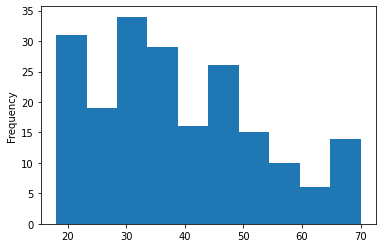

In [ ]:
data1['Age'].plot(kind = 'hist')

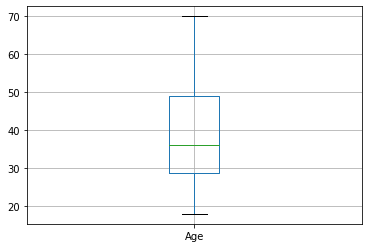

In [ ]:
data1.boxplot(column = 'Age')

### annual Income


In [ ]:
data1['Annual Income (k$)'].isnull().sum()

0

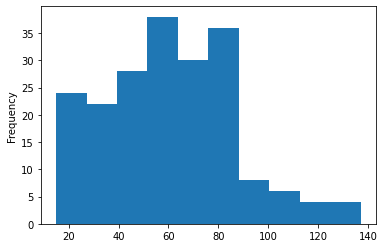

In [ ]:
data1['Annual Income (k$)'].plot(kind = 'hist')

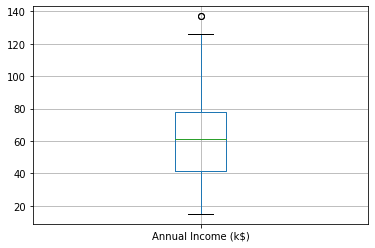

In [ ]:
data1.boxplot(column = 'Annual Income (k$)')

### Spending Score (1-100)

In [ ]:
data1['Spending Score (1-100)'].isnull().sum()

0

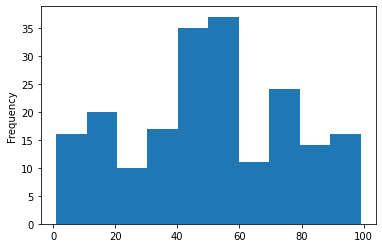

In [ ]:
data1['Spending Score (1-100)'].plot(kind = 'hist')

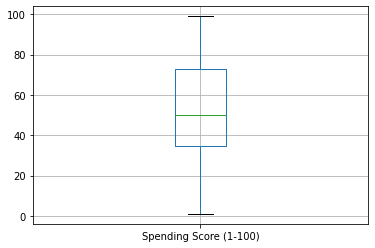

In [ ]:
data1.boxplot(column = 'Spending Score (1-100)')

### checking if tranformation is requires

In [ ]:
log_columns = data1[numerical_cols].skew().sort_values(ascending=False)
log_columns = log_columns.loc[log_columns > 0.75]
log_columns

Series([], dtype: float64)

### Pairplot

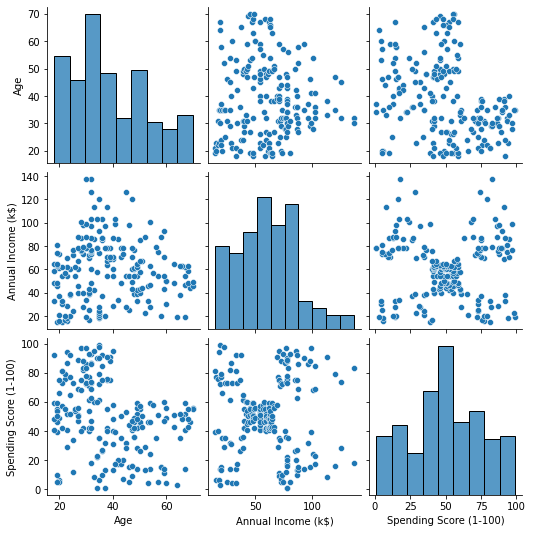

In [ ]:
sns.pairplot(data1)

## Categorical column

In [ ]:
categorical_cols = data1.dtypes[data.dtypes == "object"].index
print(categorical_cols)


Index(['Gender'], dtype='object')


In [ ]:
data1['Gender'].isnull().sum()

0

In [ ]:
data1['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [ ]:
ct = pd.crosstab(index = data1['Gender'], columns = 'count')
ct


col_0,count
Gender,
Female,112
Male,88


In [ ]:
genderavg = dict()
dummydata = data1[data1['Gender'] == 'Female']
genderavg['Female'] = dummydata['Spending Score (1-100)'].mean()
dummydata = data1[data1['Gender'] == 'Male']
genderavg['Male'] = dummydata['Spending Score (1-100)'].mean()
print(pd.DataFrame(genderavg.items()))

        0          1
0  Female  51.526786
1    Male  48.511364


On a average woman spend more than men

In [ ]:
genderavg = dict()
dummydata = data1[data1['Gender'] == 'Female']
genderavg['Female'] = dummydata['Annual Income (k$)'].mean()
dummydata = data1[data1['Gender'] == 'Male']
genderavg['Male'] = dummydata['Annual Income (k$)'].mean()
print(pd.DataFrame(genderavg.items()))

        0          1
0  Female  59.250000
1    Male  62.227273


On a average men earn more women

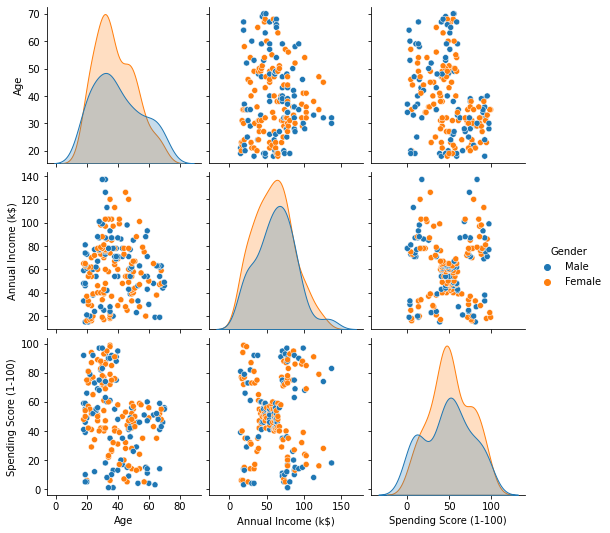

In [ ]:
sns.pairplot(data1, hue = 'Gender')

In [ ]:
# Do the one hot encoding
data2 = data1.copy()
data2 = pd.get_dummies(data2, columns=['Gender'])
data2.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,19,15,39,0,1
1,21,15,81,0,1
2,20,16,6,1,0
3,23,16,77,1,0
4,31,17,40,1,0


# SCaling

In [116]:
sc = StandardScaler()
metrics = dict()
scaled_data = sc.fit_transform(data2)



# K means

In [ ]:
scores = []
inertia = []
for i in range(2,20):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(scaled_data)
    scores.append(silhouette_score(scaled_data, kmeans.labels_, metric='euclidean'))
    inertia.append(kmeans.inertia_)

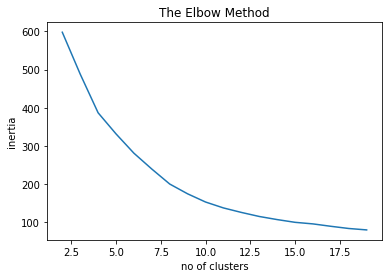

In [ ]:
plt.plot(range(2,20), inertia)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('inertia')
plt.show()

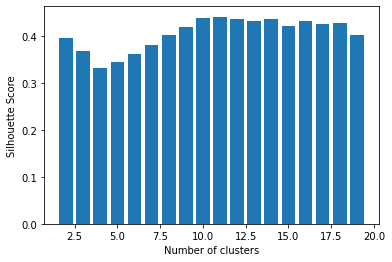

In [ ]:
plt.bar(range(2,20), scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show() 

In [102]:
kmeans = KMeans(n_clusters= 11, init='k-means++', random_state=0)
kmeans.fit(scaled_data)
data3 = data2.copy()
data3['kmeans_scaled'] = kmeans.predict(scaled_data)
data3.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male,kmeans_scaled
0,19,15,39,0,1,3
1,21,15,81,0,1,3
2,20,16,6,1,0,8
3,23,16,77,1,0,9
4,31,17,40,1,0,8


In [165]:
Gender_kmean = pd.crosstab(index=data["Gender"], 
                           columns=data3['kmeans_scaled'], margins = True)
Gender_kmean

kmeans_scaled,0,1,2,3,4,5,6,7,8,9,10,All
Gender,,,,,,,,,,,,
Female,0,25,0,0,14,26,0,21,13,13,0,112
Male,18,0,20,23,0,0,21,0,0,0,6,88
All,18,25,20,23,14,26,21,21,13,13,6,200


In [ ]:
ct = pd.crosstab(index = data3['kmeans_scaled'], columns = 'count')
ct


col_0,count
kmeans_scaled,
0,18
1,25
2,20
3,23
4,14
5,26
6,21
7,21
8,13


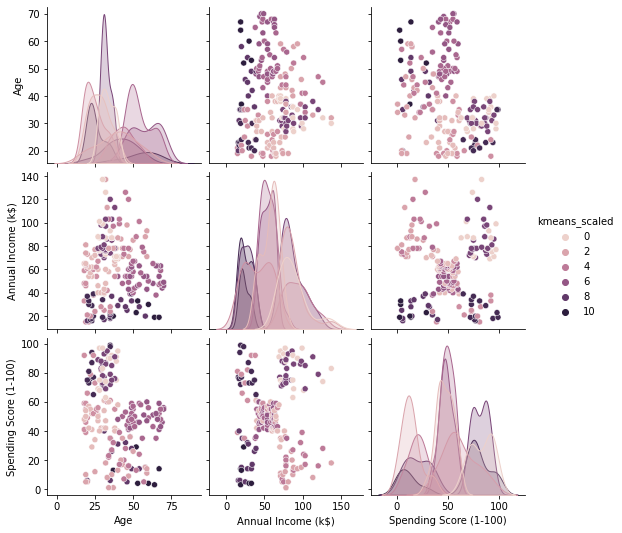

In [ ]:
cols = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)','kmeans_scaled']

sns.pairplot(data3[cols], hue = 'kmeans_scaled')

In [117]:
kmeans_clust_scaled = kmeans.predict(scaled_data)

metrics['kmeans'] = silhouette_score(scaled_data,kmeans_clust_scaled)
metrics['kmeans']

0.4419137813527599

# Agglomerative Clustering

In [ ]:
scores = dict()
for linkage in ['ward', 'complete', 'average', 'single']:
    ag = AgglomerativeClustering(n_clusters=11, linkage=linkage, compute_full_tree=True)
    ag.fit(scaled_data)
    scores[str('agglom_'+linkage)] = silhouette_score(scaled_data, ag.fit_predict(scaled_data))

In [ ]:
scores

{'agglom_average': 0.38449330178743374,
 'agglom_complete': 0.4020137460961655,
 'agglom_single': 0.009976340809937402,
 'agglom_ward': 0.4355066737947972}

In [100]:
scores = dict()
for n in range(2,20):
    ag = AgglomerativeClustering(n_clusters=n, linkage='ward', compute_full_tree=True)
    ag.fit(scaled_data)
    scores[str('agglom_'+ str(n))] = silhouette_score(scaled_data, ag.fit_predict(scaled_data))

In [101]:
scores

{'agglom_10': 0.43560596392122847,
 'agglom_11': 0.4355066737947972,
 'agglom_12': 0.4300976960875954,
 'agglom_13': 0.42587063067148523,
 'agglom_14': 0.43083305900124713,
 'agglom_15': 0.43886356727102505,
 'agglom_16': 0.44344534774949396,
 'agglom_17': 0.4231040453677005,
 'agglom_18': 0.43083120416847664,
 'agglom_19': 0.42667122533364904,
 'agglom_2': 0.39644160577705434,
 'agglom_3': 0.36282121580109944,
 'agglom_4': 0.3201778121643018,
 'agglom_5': 0.33339195354757967,
 'agglom_6': 0.35445606368360066,
 'agglom_7': 0.36050917293397844,
 'agglom_8': 0.392162082518261,
 'agglom_9': 0.4069804703665158}

In [118]:
ag = AgglomerativeClustering(n_clusters=16, linkage='ward', compute_full_tree=True)
ag = ag.fit(scaled_data)
data3['agg'] = ag.fit_predict(scaled_data)
ag_score =  silhouette_score(scaled_data, ag.fit_predict(scaled_data))
metrics['AGG'] = ag_score
metrics['AGG']

0.44344534774949396

In [164]:
Gender_agg = pd.crosstab(index=data["Gender"], 
                           columns=data3['agg'], margins = True)
Gender_agg

agg,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,All
Gender,,,,,,,,,,,,,,,,,
Female,25,0,21,15,13,0,0,25,13,0,0,0,0,0,0,0,112
Male,0,6,0,0,0,10,12,0,0,12,4,3,13,16,10,2,88
All,25,6,21,15,13,10,12,25,13,12,4,3,13,16,10,2,200


In [109]:
ct = pd.crosstab(index = data3['agg'], columns = 'count')
ct


col_0,count
agg,
0,25
1,6
2,21
3,15
4,13
5,10
6,12
7,25
8,13


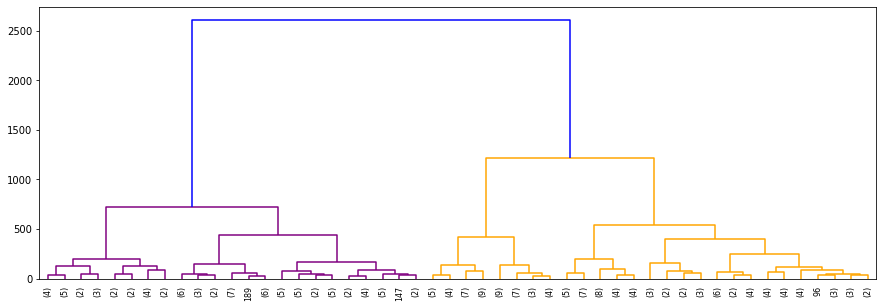

In [115]:
Z = hierarchy.linkage(ag.children_, method='ward')

fig, ax = plt.subplots(figsize=(15,5))


hierarchy.set_link_color_palette(['purple', 'orange'])

den = hierarchy.dendrogram(Z, orientation='top', 
                           p=50, truncate_mode='lastp',
                           show_leaf_counts=True, ax=ax,
                           above_threshold_color='blue')

# DBSCAN

In [148]:
dbscan = DBSCAN(eps=2, min_samples=20)
dbscan.fit(scaled_data)
data3['dbscan'] = dbscan.fit_predict(scaled_data)
dbscan_score =  silhouette_score(scaled_data, dbscan.fit_predict(scaled_data))
metrics['dbscan'] = dbscan_score
metrics['dbscan']

0.39644160577705434

In [162]:
Gender_dbscan = pd.crosstab(index=data["Gender"], 
                           columns=data3['dbscan'], margins = True)
Gender_dbscan

dbscan,0,1,All
Gender,,,
Female,0,112,112
Male,88,0,88
All,88,112,200


In [146]:
ct = pd.crosstab(index = data3['dbscan'], columns = 'count')
ct


col_0,count
dbscan,
0,88
1,112


# Mean Shift

In [158]:
bandwidth = estimate_bandwidth(scaled_data,quantile=0.20)
meanshift = MeanShift(bandwidth=bandwidth,bin_seeding=True)
meanshift.fit(scaled_data)

data3['meanshift'] = meanshift.fit_predict(scaled_data)
ms_score =  silhouette_score(scaled_data, meanshift.fit_predict(scaled_data))
metrics['meanshift'] = ms_score
metrics['meanshift']


0.39644160577705434

In [160]:
ct = pd.crosstab(index = data3['meanshift'], columns = 'count')
ct


col_0,count
meanshift,
0,112
1,88


In [163]:
Gender_meanshift = pd.crosstab(index=data["Gender"], 
                           columns=data3['meanshift'], margins = True)
Gender_meanshift

meanshift,0,1,All
Gender,,,
Female,112,0,112
Male,0,88,88
All,112,88,200


# Model selection

In [159]:
pd.DataFrame(metrics.items())

,0,1
0,kmeans,0.441914
1,AGG,0.443445
2,dbscan,0.396442
3,meanshift,0.396442


In [167]:
display(Gender_kmean)
display(Gender_agg)
display(Gender_dbscan) 
display(Gender_meanshift)

kmeans_scaled,0,1,2,3,4,5,6,7,8,9,10,All
Gender,,,,,,,,,,,,
Female,0,25,0,0,14,26,0,21,13,13,0,112
Male,18,0,20,23,0,0,21,0,0,0,6,88
All,18,25,20,23,14,26,21,21,13,13,6,200


agg,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,All
Gender,,,,,,,,,,,,,,,,,
Female,25,0,21,15,13,0,0,25,13,0,0,0,0,0,0,0,112
Male,0,6,0,0,0,10,12,0,0,12,4,3,13,16,10,2,88
All,25,6,21,15,13,10,12,25,13,12,4,3,13,16,10,2,200


dbscan,0,1,All
Gender,,,
Female,0,112,112
Male,88,0,88
All,88,112,200


meanshift,0,1,All
Gender,,,
Female,112,0,112
Male,0,88,88
All,112,88,200


# Conclusion

Comparing both results we get to know that Ward-link Agglomerative Clustering was better with silhouette_score of 0.443445
Even though DBscan and meanShift were able to cluster the genders perfectly

# Next steps




*   Use pca to reduce and repeat the all alogrithm to see any better customer segmentation
*   Hyperparameter tuning for meanshift and dbscan

